# Análise e Classificação de Faces: Visão Computacional com OpenCV
## Objetivos
* Seja capaz de extrair regiões de interesse de uma imagem.
* Normalize e pré-processe conjunto de dados de imagens.
* Construa classificadores para reconhecimento de faces.
* Valide a precisão do modelo construído para posterior aplicação em aplicações do mundo real.
* Extraia regiões do rosto humano baseado em marcos faciais.
* Crie aplicações que analise diferentes condições de cada componente do rosto humano.

Link: https://cursos.alura.com.br/course/analise-classificacao-faces-visao-computacional-opencv

## Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import dlib

## Importando os dados

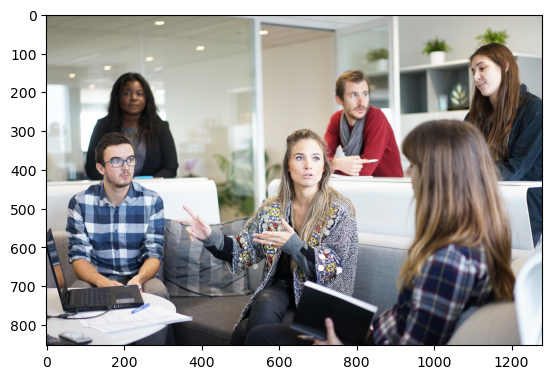

In [61]:
imagem = cv2.imread('imagens/px-people.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.show()

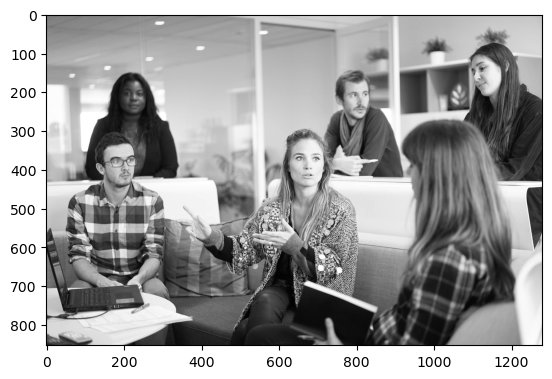

In [62]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
plt.imshow(imagem_gray, cmap='gray')
plt.show()

In [63]:
classificador = cv2.CascadeClassifier(r'C:\Users\guilh\Anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)
len(faces)

5

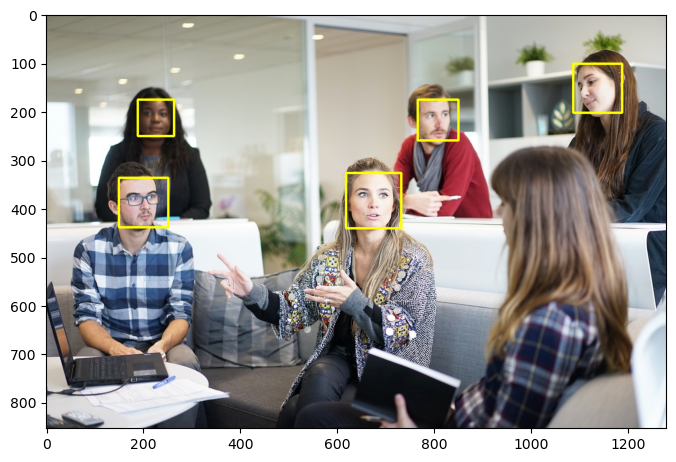

In [64]:
imagem_anotada = imagem.copy()

for (x,y,w,h) in faces:
    cv2.rectangle(imagem_anotada, (x,y), (x+w,y+h), (255,255,0), 3)

fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(imagem_anotada, cmap='gray')
plt.show()

In [65]:
face_imagem = 0

for (x,y,w,h) in faces:
    face_imagem += 1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite('output/face_'+str(face_imagem) + '.png', imagem_roi)

In [66]:
lista_modelo = ['modelo1.png', 'modelo2.png', 'modelo3.png']
face_imagem = 0

for modelo in lista_modelo:
    faces = None
    imagem = cv2.imread('imagens/' + modelo)
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    faces = classificador.detectMultiScale(imagem_gray, 1.2, 5)
    for (x,y,w,h) in faces:
        face_imagem += 1
        imagem_roi = imagem[y:y+h, x:x+w]
        cv2.imwrite('output/face_modelo_'+str(face_imagem) + '.png', imagem_roi)
    